## Week 11 Lecture `.ipynb` File

#### Author: Mahmoud Harding


## R in a Jupyter Notebook

We can run `R` in a Jupyter Notebook using an `R` kernel. Jupyter Notebooks support multiple programming languages, and `R` is one of them. If you look in the upper right corner of this window you'll see an `R`. 

In this week’s notebook, you will:

- reacquaint yourself with the Jupyter Notebook interface.

- explore visualization techniques for specific data types and objectives.

- create visualizations using functions from the `ggplot2` package.

Let's load the `dplyr` and `ggplot2` packages.

In [2]:
## Load the dplyr and ggplot2 packages
library('dplyr')
library('ggplot2')

## Set the size and dpi parameters for all the plots
## Do not change or delete the following line of code
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res=100)


Attaching package: ‘dplyr’


The following object is masked _by_ ‘.GlobalEnv’:

    starwars


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




We will work with data from the `skyscapers` dataset. 

The datasheet can be accessed [here](https://docs.google.com/document/d/1QC70i7x9uwBt82rvnJ60AvGt3mYdD8FZhkkNVA_rIVQ/edit?tab=t.0).

Run the cell below to load the dataset and display the first 5 rows of the dataframe.

In [3]:
skyscrapers <- read.csv('data/skyscrapers.csv')
head(skyscrapers, 5)

,name,location.city,country,status.started.year,status.completed.year,statistics.height,statistics.floors.above,material,function.
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>
1,Burj Khalifa,Dubai,UAE,2009,2010,"828 m / 2,722 ft",39,steel/concrete,variety
2,Shanghai Tower,Shanghai,China,2008,2014,635 m / 2073 ft,128,composite,"Misc, Cultural Monument"
3,Makkah Royal Clock Tower,Mecca,Saudi Arabia,2002,2012,601 m / 1972ft,120,steel/concrete,Clock/Retail/Hotel/Residential
4,Ping An Finance Center,Shenzhen,China,2010,2017,599.1 m / 1965ft,115,composite,Office/Retail/Hotel
5,Lotte World Tower,Seoul,South Korea,2012,2017,"554.5 m / 1,819 ft",123,composite,hotel / residential / office / retail


Now let's look at the structure of the dataframe.

In [4]:
str(skyscrapers)

'data.frame':	101 obs. of  9 variables:
 $ name                   : chr  "Burj Khalifa" "Shanghai Tower" "Makkah Royal Clock Tower" "Ping An Finance Center" ...
 $ location.city          : chr  "Dubai" "Shanghai" "Mecca" "Shenzhen" ...
 $ country                : chr  "UAE" "China" "Saudi Arabia" "China" ...
 $ status.started.year    : int  2009 2008 2002 2010 2012 2006 2010 2103 2012 1999 ...
 $ status.completed.year  : int  2010 2014 2012 2017 2017 2014 2016 2019 2018 2004 ...
 $ statistics.height      : chr  "828 m / 2,722 ft" "635 m / 2073 ft" "601 m / 1972ft" "599.1 m / 1965ft" ...
 $ statistics.floors.above: int  39 128 120 115 123 94 111 97 109 101 ...
 $ material               : chr  "steel/concrete" "composite" "steel/concrete" "composite" ...
 $ function.              : chr  "variety" "Misc, Cultural Monument" "Clock/Retail/Hotel/Residential" "Office/Retail/Hotel" ...


Let's rename the columns to improve readability and ease of use.

In [5]:
## List the names of the columns as a vector
colnames(skyscrapers)

[1] "name"                    "location.city"          
[3] "country"                 "status.started.year"    
[5] "status.completed.year"   "statistics.height"      
[7] "statistics.floors.above" "material"               
[9] "function."

In [6]:
## Rename the columns using the index
colnames(skyscrapers)[2] <- 'city'
colnames(skyscrapers)[4] <- 'year_started'
colnames(skyscrapers)[5] <-'year_completed'
colnames(skyscrapers)[6] <- 'height'
colnames(skyscrapers)[7] <- 'floors'

## Verify the renamed columns
colnames(skyscrapers)

[1] "name"           "city"           "country"        "year_started"  
[5] "year_completed" "height"         "floors"         "material"      
[9] "function."

**Example 1.** How many skyscrapers are there in each country?

In [7]:
table(skyscrapers$country)


                     China                      Dubai 
                        49                          1 
                   Germany                     Kuwait 
                         1                          1 
                   Malasya                   Malaysia 
                         2                          2 
                  New York                     Russia 
                         1                          5 
              saudi Arabia               Saudi Arabia 
                         1                          1 
                  Shenzhen                South Korea 
                         1                          3 
                     Spain                     Taiwan 
                         1                          2 
                       UAE       United Arab Emirates 
                         1                         12 
United Arab Emirates (UAE)    United Sates of America 
                         2                          1 
  United 

## Renaming Specific Values 

This code

```
table(skyscrapers$country)
```

executed without any errors, but the output is incorrect because the same country has been entered in different ways, leading to inconsistent results. For instance:

- USA, US, and United States of America are listed separately, though they refer to the same country.

- United Arab Emirates appears multiple times as United Arab Emirates (UAE) and UAE.

- Malaysia is misspelled as Malasya.

- Saudi Arabia is listed as saudi Arabia (with a lowercase "s").

**Example 2.** Reassign the values `US`,  `United Sates of America`, and `United Sates of America` to `USA`.

In [8]:
## Create a vector 'usa' containing different variations 
## of the United States name
usa <- c("US", "United Sates of America", "United States of America")

## Loop through the first 20 elements in the 'country' column 
## of the 'skyscrapers' data frame
for (i in 1:20) {
    
    ## Print the element number and the corresponding country name
    print(paste("Element", i, "is", skyscrapers$country[i]))
}

[1] "Element 1 is UAE"
[1] "Element 2 is China"
[1] "Element 3 is Saudi Arabia"
[1] "Element 4 is China"
[1] "Element 5 is South Korea"
[1] "Element 6 is New York"
[1] "Element 7 is China"
[1] "Element 8 is China"
[1] "Element 9 is China"
[1] "Element 10 is Taiwan"
[1] "Element 11 is China"
[1] "Element 12 is China"
[1] "Element 13 is USA"
[1] "Element 14 is Russia"
[1] "Element 15 is Vietnam"
[1] "Element 16 is China"
[1] "Element 17 is Malasya"
[1] "Element 18 is Malasya"
[1] "Element 19 is China"
[1] "Element 20 is China"


In [9]:
## Loop through each element in the 'country' column of the 
## 'skyscrapers' data frame
for (i in 1:length(skyscrapers$country)) {
    
    ## Check if the current country value is in the 'usa' vector
    if (skyscrapers$country[i] %in% usa) {
        
        ## If it matches, print the element number and the country name
        print(paste("Element", i, "is", skyscrapers$country[i]))
    }
}

[1] "Element 23 is United States of America"
[1] "Element 26 is United States of America"
[1] "Element 27 is United States of America"
[1] "Element 28 is United States of America"
[1] "Element 30 is United States of America"
[1] "Element 43 is United States of America"
[1] "Element 49 is United Sates of America"
[1] "Element 61 is United States of America"
[1] "Element 80 is US"
[1] "Element 87 is United States of America"
[1] "Element 98 is United States of America"


In [10]:
## Loop through each element in the 'country' column of the 
## 'skyscrapers' data frame
for (i in 1:length(skyscrapers$country)) {
    
    ## Check if the current country value is in the 'usa' vector
    if (skyscrapers$country[i] %in% usa) {
        
        ## If it matches, print the element number and the original country name
        print(paste("Element", i, "was", skyscrapers$country[i]))
        
        ## Update the country value to "USA" for consistency
        skyscrapers$country[i] <- "USA"
        
        ## Print the updated country value for the current element
        print(paste("Now element", i, "is", skyscrapers$country[i]))
    }
}

[1] "Element 23 was United States of America"
[1] "Now element 23 is USA"
[1] "Element 26 was United States of America"
[1] "Now element 26 is USA"
[1] "Element 27 was United States of America"
[1] "Now element 27 is USA"
[1] "Element 28 was United States of America"
[1] "Now element 28 is USA"
[1] "Element 30 was United States of America"
[1] "Now element 30 is USA"
[1] "Element 43 was United States of America"
[1] "Now element 43 is USA"
[1] "Element 49 was United Sates of America"
[1] "Now element 49 is USA"
[1] "Element 61 was United States of America"
[1] "Now element 61 is USA"
[1] "Element 80 was US"
[1] "Now element 80 is USA"
[1] "Element 87 was United States of America"
[1] "Now element 87 is USA"
[1] "Element 98 was United States of America"
[1] "Now element 98 is USA"


**Example 3.** Reassign the values `United Arab Emirates (UAE)`, `Dubai`, and `United Arab Emirates` to `UAE`.

In [11]:
## Step 1

In [12]:
## Step 2

In [13]:
## Step 3

**Example 4.** Display a table fo the number of skyscrapers in each country sorted in descending order by frequency.

In [14]:
## Create a frequency table of the 'country' column in the 'skyscrapers' data frame
## Sort the table in descending order to show countries with the most skyscrapers first
sort(table(skyscrapers$country), decreasing=TRUE)


                     China                        USA 
                        49                         14 
      United Arab Emirates                     Russia 
                        12                          5 
               South Korea                    Malasya 
                         3                          2 
                  Malaysia                     Taiwan 
                         2                          2 
United Arab Emirates (UAE)                      Dubai 
                         2                          1 
                   Germany                     Kuwait 
                         1                          1 
                  New York               saudi Arabia 
                         1                          1 
              Saudi Arabia                   Shenzhen 
                         1                          1 
                     Spain                        UAE 
                         1                          1 
         

An alternative approach to examine the distribution of categorical labels is through visualization.

## Visualizing Data

The `ggplot2` package is a popular data visualization package in the `R` programming language. Developed by Hadley Wickham, it is based on the principles of the Grammar of Graphics. `ggplot2` provides a high-level interface for creating complex and customized plots with a simple syntax. It allows users to build graphics layer by layer, by adding different components like points, lines, and facets.

- `ggplot2`  Package

- `ggplot()` is the function used for plotting

  - `data.frame`

  - Aesthetics `aes()` 

  - Layers `geom_()`
  
  - Coordinate System 
  
  - Other Options

### Aesthetic (Something Visual)

- A mapping between a visual and a variable

  - position (i.e. $x$ and $y$ axes)

  - color (outside)

  - fill (inside)

  - shape (of markers)

  - line type

  - size

### Geometric Objects

- The actual marks that are put on a plot

  - points (`geom_point`, for scatter plots, dot plots, etc.)
  
  - lines (`geom_line`, for time series, trend lines, etc.)
  
  - boxplot (`geom_boxplot`)
  
  - etc.

## Bar Charts

A bar chart is a visual representation of categorical data that uses rectangular bars or columns to represent different categories. The length or height of each bar corresponds to the frequency or count of the data in that category. Bar charts are used for displaying and comparing the values of different categories.

Run the cell below to create a frequncy table of the material distribution.

In [15]:
table(skyscrapers$material)


     composite       concrete          steel steel/concrete 
            60             28              8              5 

Let's make a visualization to show the distribution of materials used to construct the skyscrapers in our dataset. 

**Example 5.** Create a `ggplot` object.

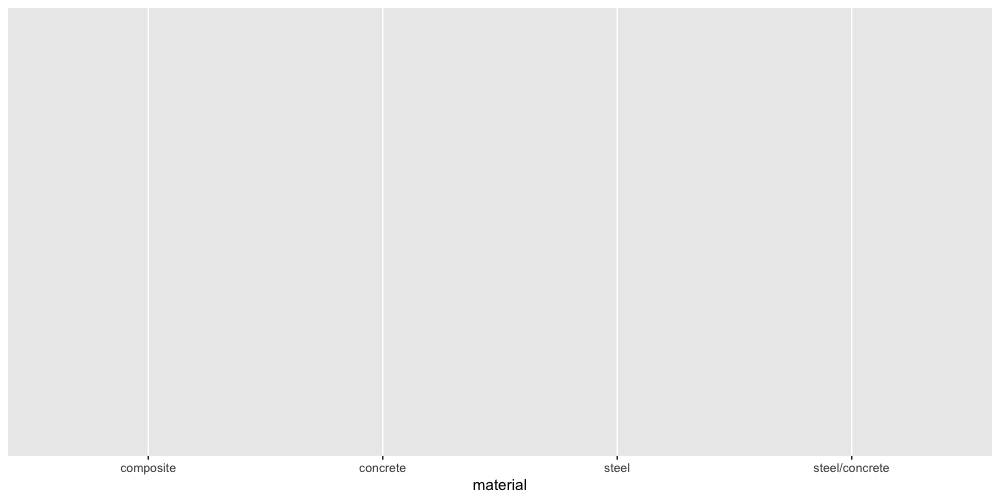

In [16]:
ggplot(data=skyscrapers, aes(x=material))

In [17]:
## The str() function displays the internal structure of the ggplot object g.

## This output shows various components of the ggplot object, such as data, mapping, 
## and layers.

## Since no layers were added, you’ll see an empty list of layers, meaning ggplot 
## has only set up the environment but has no instructions on how to display the data.
g <- ggplot(data=skyscrapers, aes(x=material))
str(g)

List of 9
 $ data       :'data.frame':	101 obs. of  9 variables:
  ..$ name          : chr [1:101] "Burj Khalifa" "Shanghai Tower" "Makkah Royal Clock Tower" "Ping An Finance Center" ...
  ..$ city          : chr [1:101] "Dubai" "Shanghai" "Mecca" "Shenzhen" ...
  ..$ country       : chr [1:101] "UAE" "China" "Saudi Arabia" "China" ...
  ..$ year_started  : int [1:101] 2009 2008 2002 2010 2012 2006 2010 2103 2012 1999 ...
  ..$ year_completed: int [1:101] 2010 2014 2012 2017 2017 2014 2016 2019 2018 2004 ...
  ..$ height        : chr [1:101] "828 m / 2,722 ft" "635 m / 2073 ft" "601 m / 1972ft" "599.1 m / 1965ft" ...
  ..$ floors        : int [1:101] 39 128 120 115 123 94 111 97 109 101 ...
  ..$ material      : chr [1:101] "steel/concrete" "composite" "steel/concrete" "composite" ...
  ..$ function.     : chr [1:101] "variety" "Misc, Cultural Monument" "Clock/Retail/Hotel/Residential" "Office/Retail/Hotel" ...
 $ layers     : list()
 $ scales     :Classes 'ScalesList', 'ggproto', 'gg'

**Example 5.** Add a `geom_bar` layer to the `ggplot` object.

- `g`: This is the base ggplot object created with `ggplot(data=skyscrapers, aes(x=material))`. It specifies the skyscrapers dataset and maps the material column to the $x-$axis. This sets up the initial plot without specifying any layers.

- `geom_bar()`: This function adds a bar chart layer to the plot. Since material is mapped to the $x-$axis, `geom_bar()` will automatically count occurrences of each category in material and display the frequencies as bars.

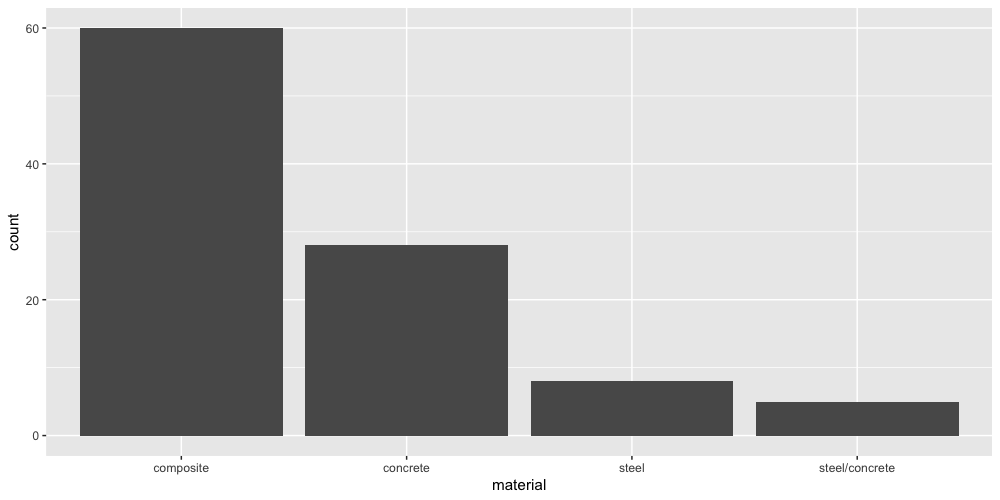

In [18]:
g <- ggplot(data=skyscrapers, aes(x=material))
g + geom_bar()

We can add addtional layers.

- `geom_bar()`: This function adds a bar chart layer to the plot. Since material is mapped to the $x-$axis, `geom_bar()` will automatically count occurrences of each category in material and display the frequencies as bars.

- `fill="red"`: This argument sets the fill color of the bars to red.

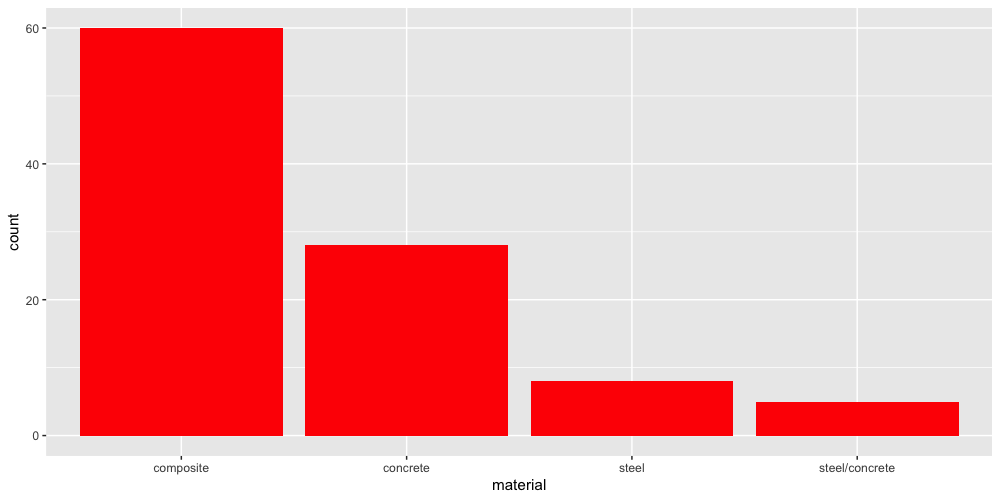

In [19]:
g <- ggplot(data=skyscrapers, aes(x=material))
g + geom_bar(fill="red")

- `labs()`: The `labs()` function in ggplot2 allows you to set or modify labels for various plot elements, such as axis labels, plot title, subtitle, and more.

- `x="Material"`: This sets the label for the $x-$axis to "Material".

- `y="Frequency"`: This sets the label for the $y-$axis to "Frequency".

- `title="Distribution of Materials"`: This sets the title of the plot to "Distribution of Materials".

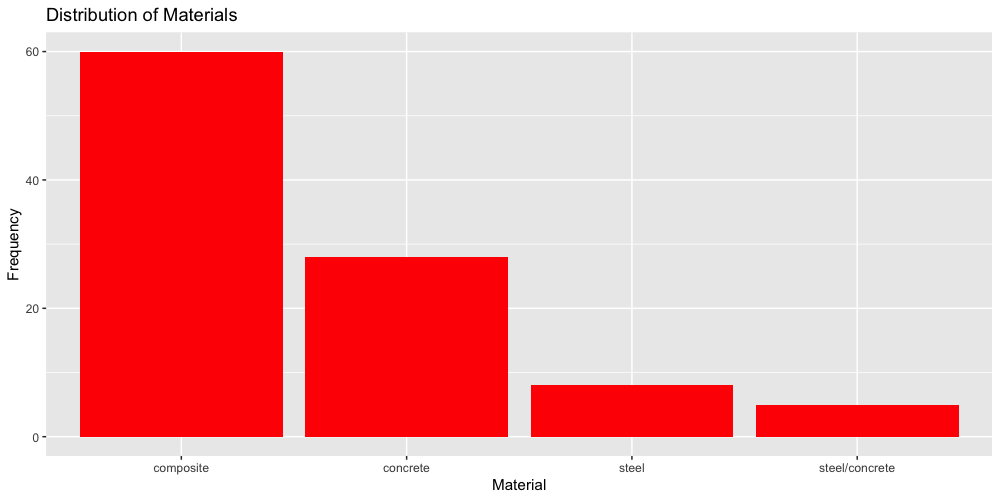

In [20]:
g <- ggplot(data=skyscrapers, aes(x=material))
g + geom_bar(fill="red") +
      labs(x="Material", y="Frequency", title="Distribution of Materials")

- `theme()` in `ggplot2` is used to modify the appearance of non-data elements in the plot, such as text, margins, axis lines, and titles.

- `plot.title` specifically targets the main title of the plot within `theme()`. By setting options within plot.title, you can change aspects like alignment, size, color, and font of the title.

- `element_text(hjust = 0.5)` is used to style text elements in the plot, such as titles or axis labels.

- `hjust`: This parameter controls the horizontal alignment of the text. It takes values between 0 and 1, where:
    
    - `hjust = 0` aligns the text to the left.

    - `hjust = 1` aligns the text to the right.

    - `hjust = 0.5` centers the text.

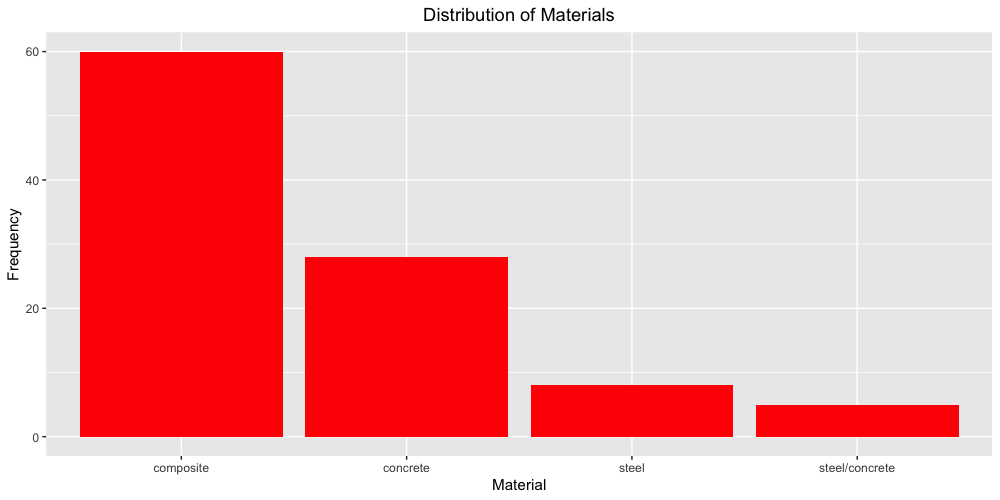

In [21]:
g <- ggplot(data=skyscrapers, aes(x=material))
g + geom_bar(fill="red") +
      labs(x="Material", y="Frequency", title="Distribution of Materials") + 
      theme(plot.title=element_text(hjust=0.5))

**Example 6.** Create a bar chart to visualize the distribution of countries in our dataset.

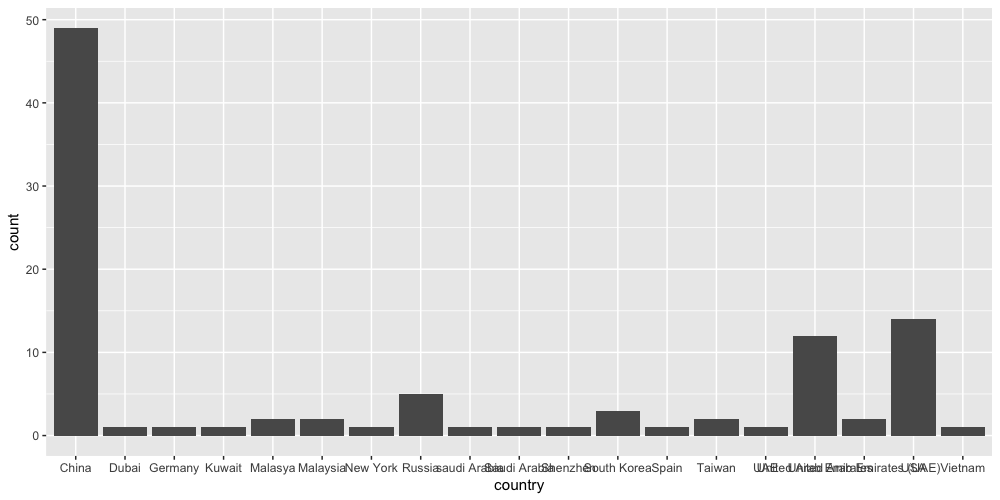

In [22]:
g <- ggplot(data=skyscrapers, aes(x=country))
g + geom_bar()

The code ran successfully, and we can see the visualization. To enhance its clarity and impact, let's focus on displaying only the top three countries based on skyscraper count, making it a more informative visualization.

The `ggplot2` function requires its input to be a `data.frame`. Therefore, we need to convert the table output from the table function into a `data.frame`.

We can use `as.data.frame()` to perform this conversion. By default, the resulting `data.frame` will have two columns, `Var1` for the labels and `Freq` for the counts.

In [23]:
as.data.frame(table(skyscrapers$country)) %>%
  head()

,Var1,Freq
,<fct>,<int>
1,China,49
2,Dubai,1
3,Germany,1
4,Kuwait,1
5,Malasya,2
6,Malaysia,2


In [24]:
## Convert the table of country counts in 'skyscrapers' to a data frame and 
## store it in 'dat'
dat <- as.data.frame(table(skyscrapers$country))

## Rename the first column to 'Country'
colnames(dat)[1] <- 'Country'

## Rename the second column to 'Count' to represent the frequency of each country
colnames(dat)[2] <- 'Count'

## Sort 'dat' in descending order by 'Count' and keep only the top 3 countries
dat <- dat %>% 
         arrange(desc(Count)) %>% 
         head(3)

dat

,Country,Count
,<fct>,<int>
1,China,49
2,USA,14
3,United Arab Emirates,12


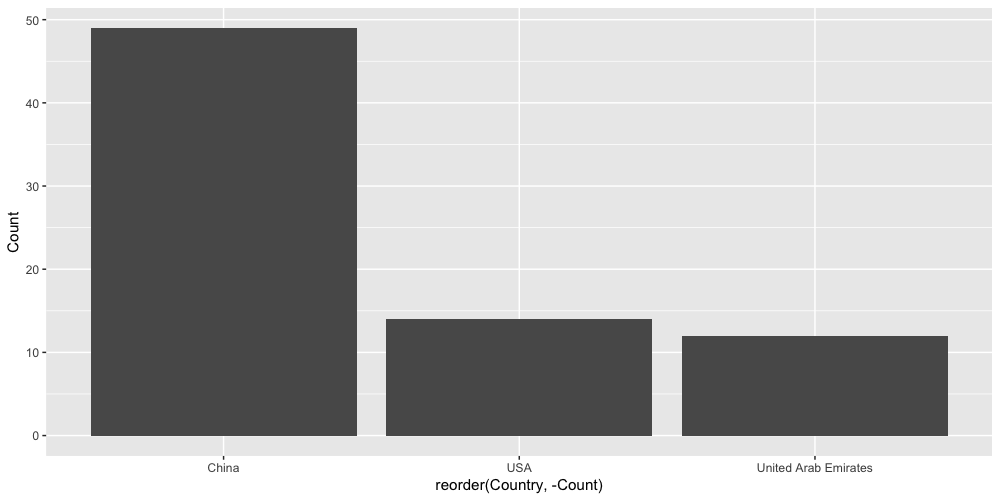

In [25]:
## Initialize a ggplot object 'g' using the 'dat' data frame
## Set 'Country' on the x-axis and 'Count' on the y-axis
## Use reorder(Country, -Count) to order countries by 'Count' in descending order
g <- ggplot(data=dat, aes(x=reorder(Country, -Count), y=Count))

## Add a bar chart layer with bars representing the actual 'Count' values for each country
## stat = "identity" tells ggplot to use the values in 'Count' as they are for the height of each bar,
## rather than calculating counts automatically
g + geom_bar(stat="identity")

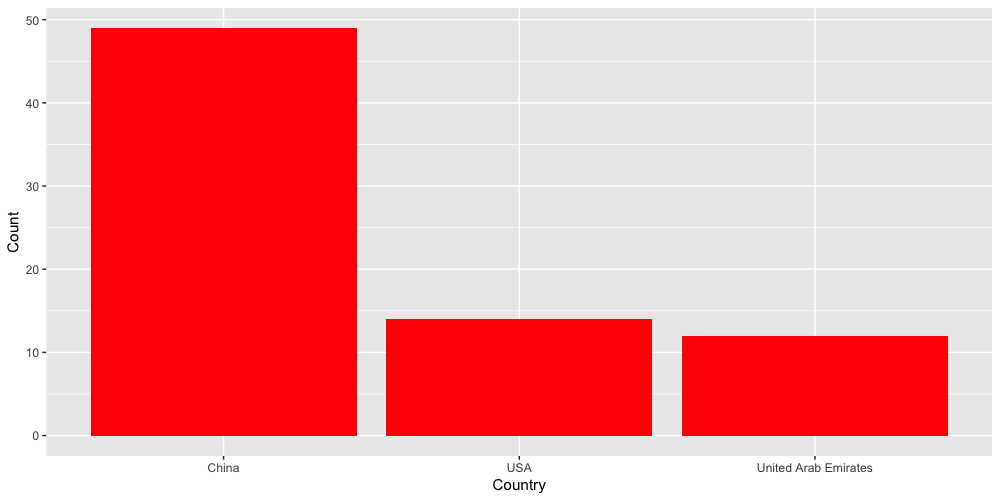

In [26]:
g <- ggplot(data=dat, aes(x=reorder(Country, -Count), y=Count))
g + geom_bar(stat="identity", fill="red") +
      labs(x="Country")

## Histograms

A histogram is a graphical representation of the distribution of a dataset. It displays the frequency distribution of a continuous variable, dividing the data into intervals (bins) and showing how many observations fall into each bin. The horizontal axis represents the variable, while the vertical axis represents the frequency or count.

**Example 7.** Create a histogram to visualize the distribution of floors in our dataset.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


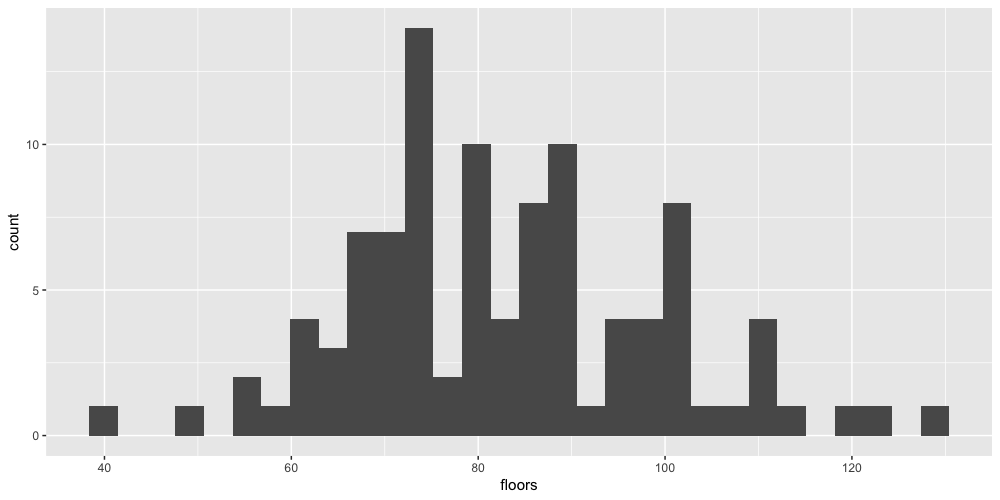

In [27]:
g <- ggplot(data=skyscrapers, aes(x=floors))

## Add a histogram layer to visualize the frequency distribution of the 
## 'floors' variable geom_histogram() automatically bins the 'floors' data 
## and displays the count of buildings within each bin on the y-axis
g + geom_histogram()

**Note:** The message 

<div style="background-color: #FFC0CB; padding: 10px;">
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
</div>

indicates that the `stat_bin()` function, used to create the histogram, suggests that you might want to pick a better value for binwidth.

Customize the `geom_histogram()` layer.

- `geom_histogram()` adds a histogram layer to a ggplot plot. 

- `color = "black"` sets the color of the border (outline) of each histogram bar to black. 

- `fill = "red"` sets the color inside each bar to red.

- `linewidth = 0.5` specifies the width of the bar borders. A smaller linewidth makes the borders thinner, which can help emphasize the bars themselves rather than the borders.

- `binwidth = 5` controls the width of each bin along the $x-$axis. In this case, each bin will span 5 units. Setting binwidth directly affects the number of bins and thus the histogram’s resolution, allowing for a more detailed or broader view of the data distribution.

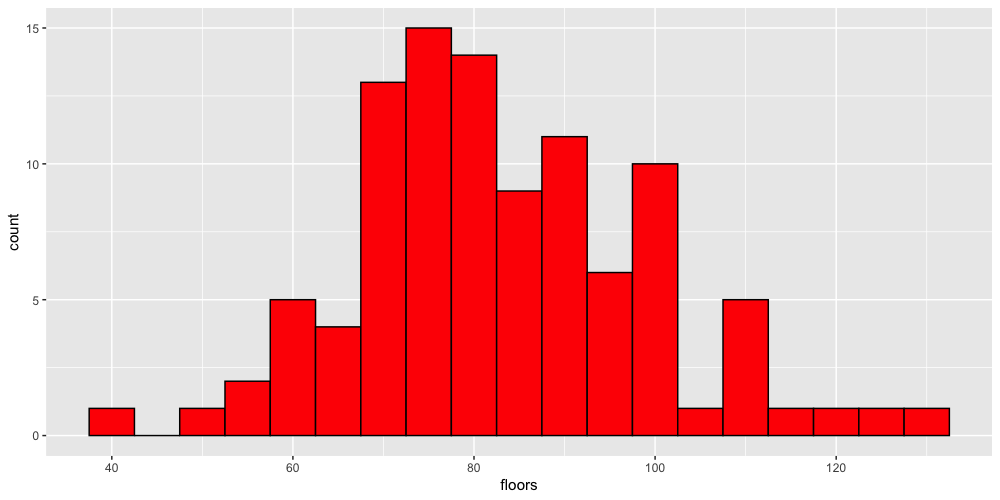

In [28]:
g  + geom_histogram(color="black", fill="red", linewidth=0.5, binwidth=5)

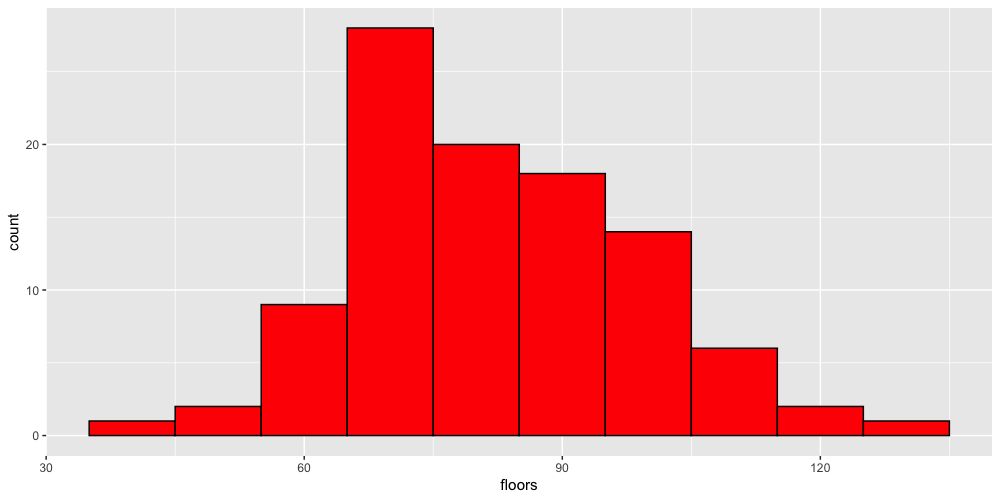

In [29]:
g  + geom_histogram(color="black", fill="red", linewidth=0.5, binwidth=10)

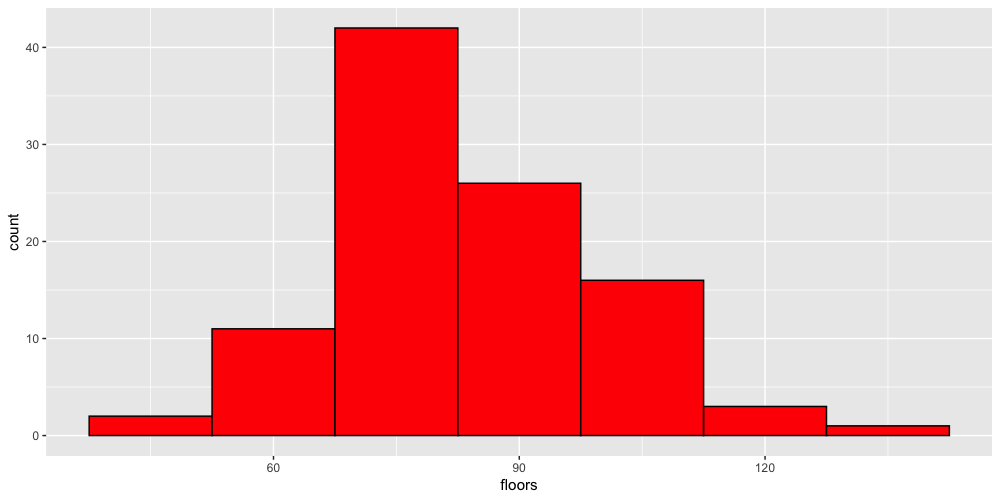

In [30]:
g  + geom_histogram(color="black", fill="red", linewidth=0.5, binwidth=15)

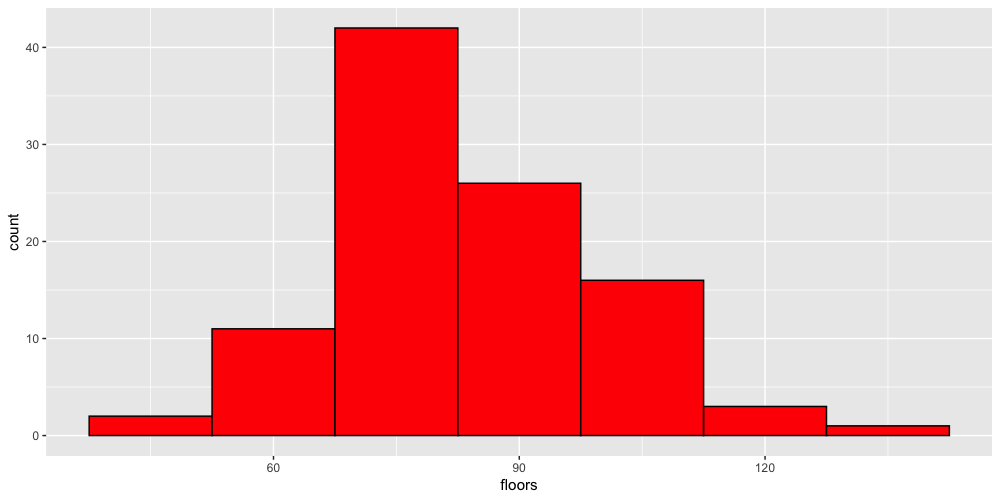

In [31]:
g  + geom_histogram(color="black", fill="red", linewidth=0.5, binwidth=15)

## Scatter Plots

A scatter plot is a type of data visualization that displays individual data points on a two-dimensional graph. Each point represents the values of two variables, and the position of the point on the graph corresponds to the values of those variables.

Scatter plots help visualize the relationship between two numerical variables. By examining the pattern formed by the points, you can infer whether there is a positive, negative, or no correlation between the variables.

We will use the `mtcars` dataset to demonstrate the use of scatter plots.

`mtcars` {datasets}

**Motor Trend Car Road Tests**

**Description**
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

| **Variable**| **Definition**                         | **Key**                                        |
|:------------|:---------------------------------------|:-----------------------------------------------|
|mpg|Miles/(US) gallon||
|cyl|Number of cylinders||
|disp|Displacement (cu. in.)||
|hp|Gross horsepower
|drat|Rear axle ratio||
|wt|Weight (1000 lbs)||
|qsec|1/4 mile time||
|vs|Engine| (0 = V-shaped, 1 = straight)|
|am|Transmission|(0 = automatic, 1 = manual)|
|gear|Number of forward gears||
|carb|Number of carburetors||

The datasheet can be found [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html).

**Example 8.** Create a scatter plot using the weight and the miles per gallon.

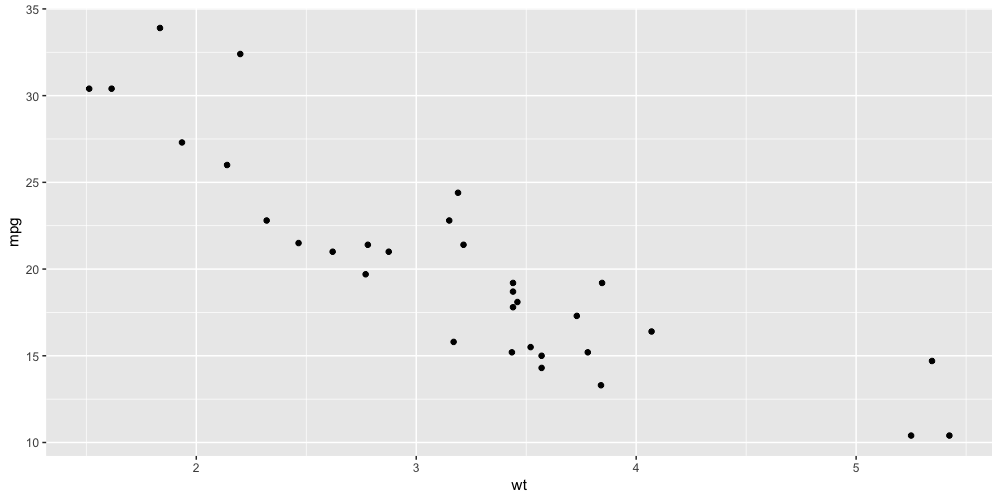

In [32]:
## Initialize a ggplot object 'g' using the 'mtcars' dataset
## Map 'wt' (weight of the car) to the x-axis and 'mpg' 
## (miles per gallon) to the y-axis
g <- ggplot(data = mtcars, aes(x = wt, y = mpg))

## Add a scatter plot layer to display individual data 
## points for each car
## Each point represents a car, showing its weight and 
## corresponding fuel efficiency
g + geom_point()

### Factors

- R data objects used to categorize data and store it using levels

- Can be strings or integers

- Useful in columns that have a limited number of unique values (e.g., Yes/No or Low/Medium/High)

- Use the `as.factor()` function to convert data into a factor

**Example 9.** Display the `cyl` column as a factor.

In [33]:
as.factor(mtcars$cyl)

[1] 6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4
Levels: 4 6 8

- `geom_point()` adds a scatter plot layer to the existing ggplot object `g`, plotting points for each observation in the dataset.

- `aes(color = as.factor(cyl))`

   - `color = as.factor(cyl)` maps the color of each point to the `cyl` variable.

   - `as.factor(cyl)` converts `cyl` to a factor, which treats each unique value of cyl as a separate category (e.g., 4, 6, or 8 cylinders).

By converting `cyl` to a factor, `ggplot2` applies a different color to each cylinder category, making it easy to distinguish cars based on the number of cylinders.

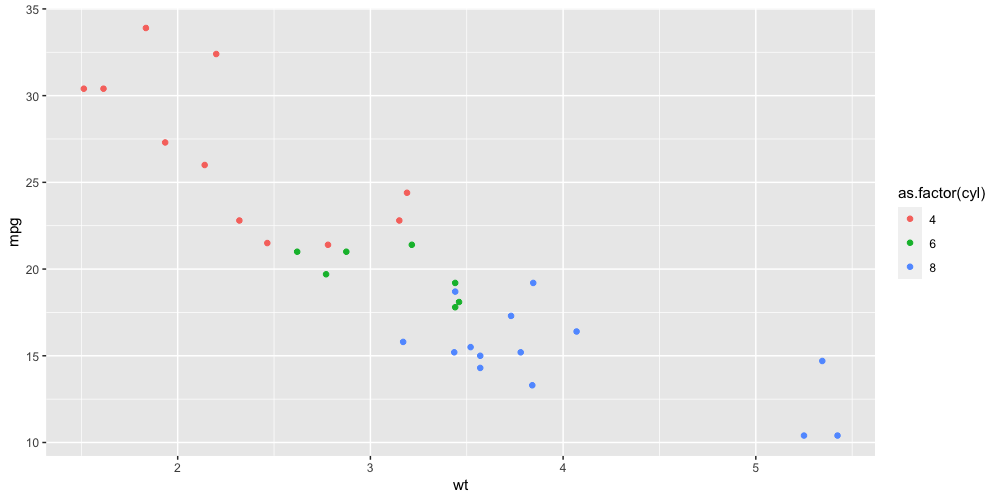

In [34]:
g <- ggplot(mtcars, aes(x=wt, y=mpg))
g + geom_point(aes(color=as.factor(cyl)))

**Example 10.** Add a trendline to the scatter plot.

- `stat_smooth()` adds a smoothed line to the plot, often used to show trends or patterns in the data. It works by fitting a model to the data and then plotting the resulting line.

- `method = "lm"` specifies the type of model to fit. Setting `method = "lm"` fits a linear model (a straight line), which represents a simple linear regression.

When added to a scatter plot, `stat_smooth(method="lm")` will overlay a linear regression line, showing the general trend of the data. By default, it also displays a shaded confidence interval around the line, indicating the uncertainty of the fit.

`geom_smooth()` using formula = 'y ~ x'


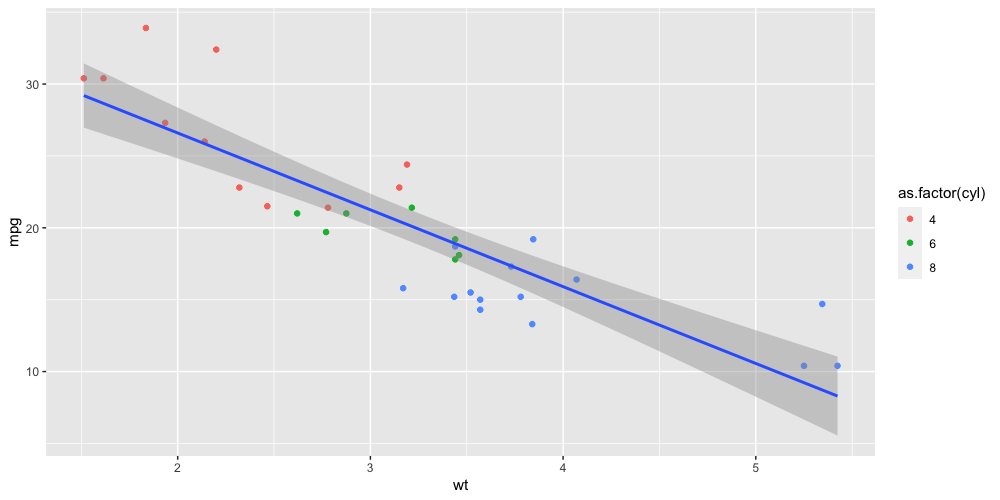

In [35]:
g + geom_point(aes(color=as.factor(cyl))) + 
      stat_smooth(method="lm")

- `se=FALSE` removes this shaded region, leaving only the trend line.

`geom_smooth()` using formula = 'y ~ x'


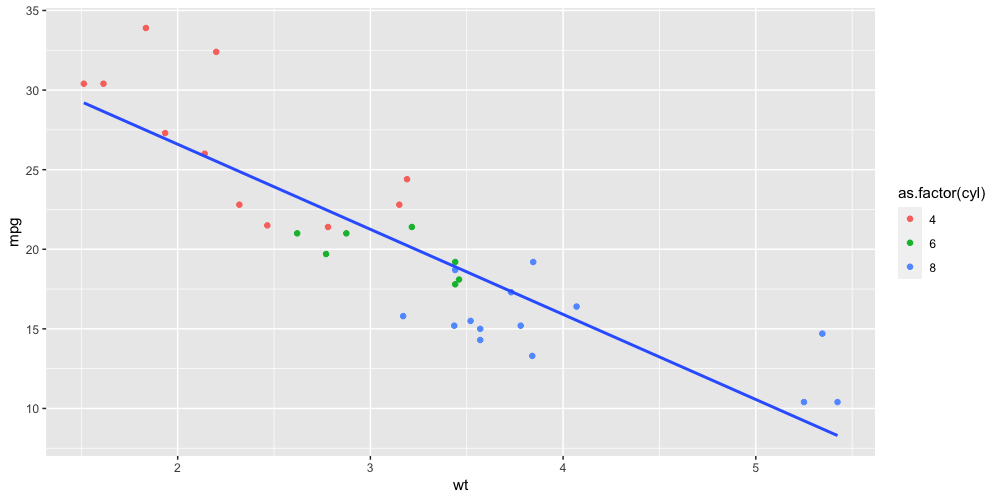

In [36]:
g + geom_point(aes(color=as.factor(cyl))) + 
      stat_smooth(method="lm", se=FALSE)

- `facet_wrap(~cyl)` splits the plot into multiple panels, one for each unique value of a variable.

- The formula `~cyl` specifies that the `cyl` variable representing the number of cylinders in `mtcars`) will be used to create the facets.

- Each unique value in cyl (e.g., 4, 6, 8 cylinders) gets its own panel, showing the data for cars with that cylinder count.

This technique is helpful for comparing trends or patterns across subsets of data.

`geom_smooth()` using formula = 'y ~ x'


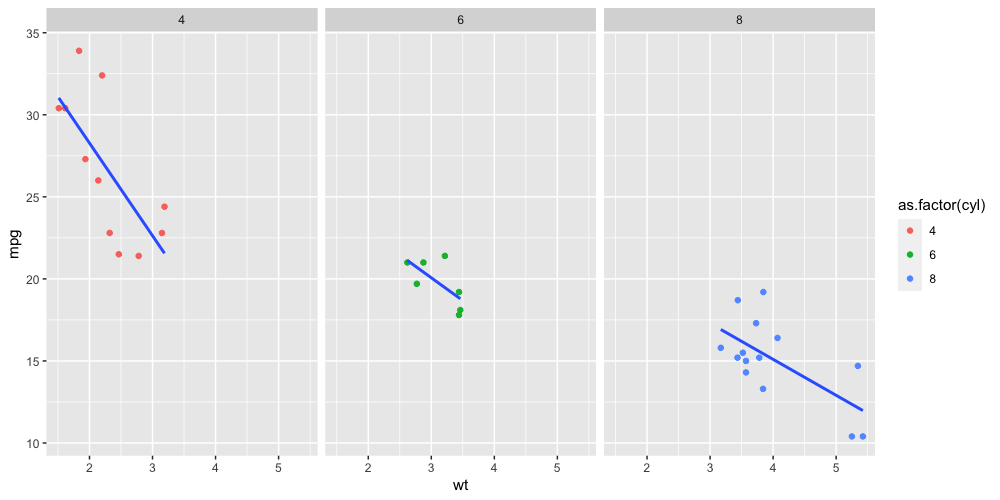

In [37]:
g + geom_point(aes(color=as.factor(cyl))) + 
      stat_smooth(method="lm", se=FALSE) +
      facet_wrap(~cyl)

#### Box Plots

We will continue to use the `mtcars` dataset to demonstrate the use of box plots.

A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It displays key statistical measures such as the median, quartiles, and potential outliers. 

Box plots provide a concise summary of the distribution of data, emphasizing the central tendency (median) and spread (IQR). In addtion, box plots are effective for comparing the distributions of different groups or categories within a dataset. They help identify differences in medians, spreads, and the presence of outliers.

**Example 11.** Create a box plot to display the distribution of `mpg` across different cylinder groups.

- `g` is a `ggplot` object that’s set up with data and aesthetic mappings `ggplot(data = mtcars, aes(x = factor(cyl), y = mpg))`.

- `cyl` (number of cylinders) is mapped to the $x-$axis as a factor, and `mpg` (miles per gallon) to the $y-$axis, allowing us to see mpg distributions for each cylinder group.

- `geom_boxplot()` adds a box plot layer to the plot.

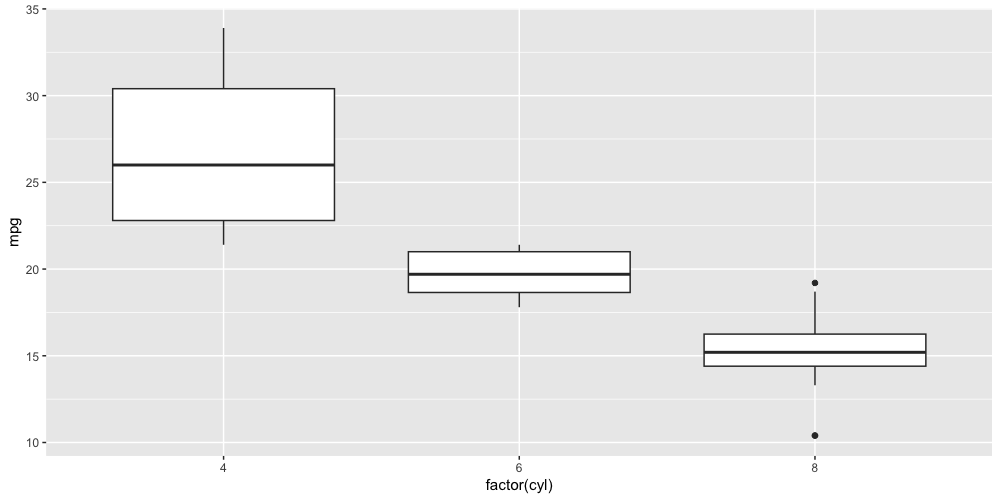

In [38]:
g <- ggplot(data=mtcars, aes(x=factor(cyl), y=mpg))
g + geom_boxplot()

- `coord_flip()` flips the coordinates of the plot.

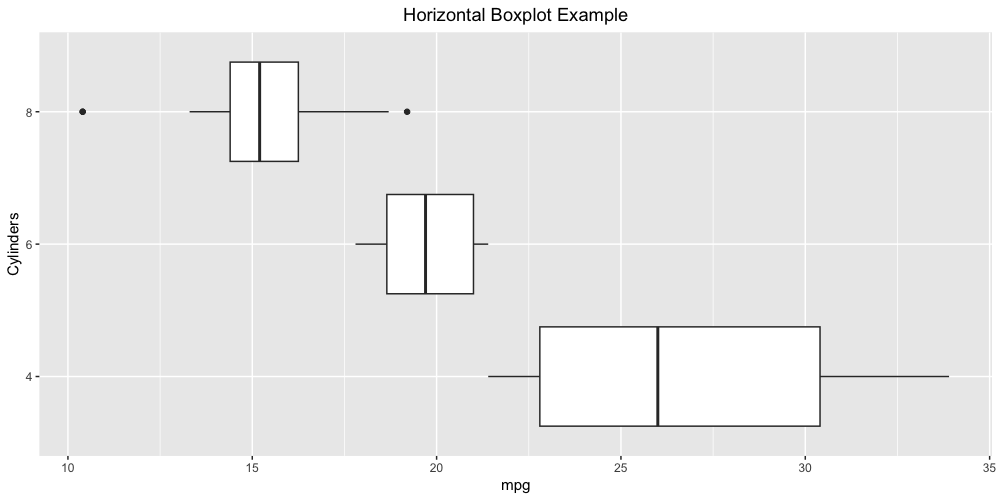

In [39]:
g <- ggplot(data=mtcars, aes(x=factor(cyl), y=mpg))
g + geom_boxplot() + coord_flip() + 
      labs(x="Cylinders", y="mpg", title="Horizontal Boxplot Example") +
      theme(plot.title=element_text(hjust=0.5))

## Line Charts

A line chart is a type of chart that displays data points called "markers" connected by straight line segments. It is commonly used to visualize trends and patterns over a continuous interval or time series. 

We will use the `hybrid` dataset to demonstrate the use of line charts.

| **Variable**| **Definition**                         |
|:------------|:---------------------------------------|
|`id`|Unique identifier|
|`model`|Model of the vehicle|
|`year`|Year|
|`msrp`|Manufacturer's suggested retail price in 2013 in dollars (`num`)|
|`msrp_dollars`|Manufacturer's suggested retail price in 2013 in dollars (`str`)|
|`accel_rate`|Acceleration rate in km/hour/second|
|`mpg`|Fuel economy in miles/gallon|
|`mpg_mpge`|Max between mpg and mpge. Mpge is the unit of measurement for an electric car's energy consumption level to compare with gas-powered vehicles' fuel consumption.|
|`class`|Model class ID - `C` = Compact, `M` = Midsize, `TS` = 2 Seater, `L` = Large, `PT` = Pickup Truck, `MV` = Minivan, `SUV` = Sport Utility Vehicle|

In [41]:
hybrid <- read.csv('data/hybrid.csv')
head(hybrid)

,id,model,year,msrp,msrp_dollars,accel_rate,mpg,mpg_mpge,class
,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1,Prius (1st gen.),1997,24509.74,"$24,509.74",7.46,41.26,41.26,C
2,2,Tino Hybrid,2000,35354.97,"$35,354.97",8.20,54.10,54.10,C
3,3,Prius (2nd gen.),2000,26832.25,"$26,832.25",7.97,45.23,45.23,C
4,4,Insight,2000,18936.41,"$18,936.41",9.52,53.00,53.00,TS
5,5,Civic Hybrid 1st gen.,2001,25833.38,"$25,833.38",7.04,47.04,47.04,C
6,6,Insight,2001,19036.71,"$19,036.71",9.52,53.00,53.00,TS


In [42]:
str(hybrid)

'data.frame':	154 obs. of  9 variables:
 $ id          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ model       : chr  "Prius (1st gen.)" "Tino Hybrid" "Prius (2nd gen.)" "Insight" ...
 $ year        : int  1997 2000 2000 2000 2001 2001 2002 2003 2003 2003 ...
 $ msrp        : num  24510 35355 26832 18936 25833 ...
 $ msrp_dollars: chr  "$24,509.74 " "$35,354.97 " "$26,832.25 " "$18,936.41 " ...
 $ accel_rate  : num  7.46 8.2 7.97 9.52 7.04 9.52 9.71 8.33 9.52 8.62 ...
 $ mpg         : num  41.3 54.1 45.2 53 47 ...
 $ mpg_mpge    : num  41.3 54.1 45.2 53 47 ...
 $ class       : chr  "C" "C" "C" "TS" ...


**Example 12.** Create a line chart to illustrate the change in median MSRP over the years.

- `aes(x = year, y = msrp)` maps the year variable to the $x-$axis and msrp (the retail price) to the $y-$axis.

- `geom_line()` adds a line layer to the plot, connecting data points sequentially by year on the $x-$axis and msrp on the $y-$axis.

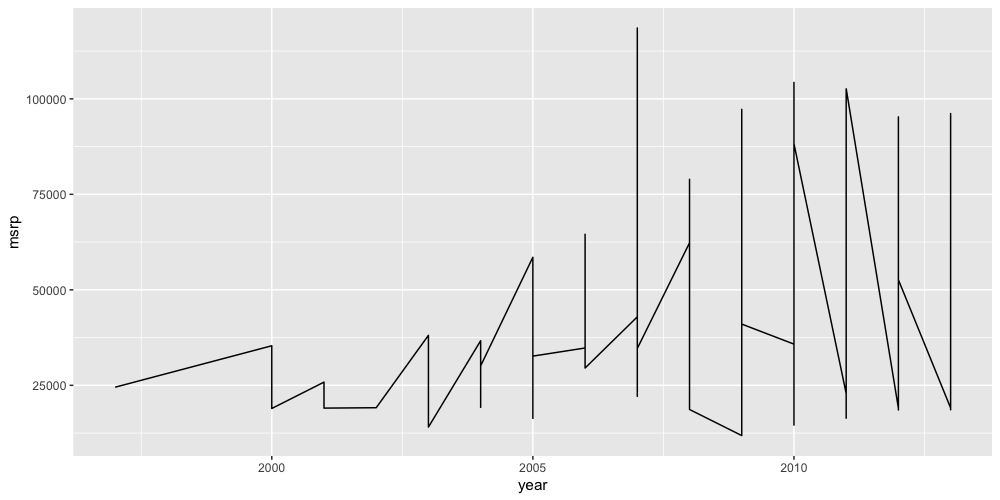

In [43]:
g <- ggplot(data=hybrid, aes(x=year, y=msrp)) 
g + geom_line()

What happened?

In [44]:
## Start with the 'hybrid' dataset and apply the following transformations
dat <- hybrid %>%
  
         ## Group the data by the 'year' column so that calculations are done within each year
         group_by(year) %>%
         
         ## Calculate the median MSRP within each year group and store it as 'MedMsrp'
         summarize(MedMsrp = median(msrp))

head(dat)

year,MedMsrp
<int>,<dbl>
1997,24509.74
2000,26832.25
2001,22435.04
2002,19137.01
2003,19137.01
2004,25222.64


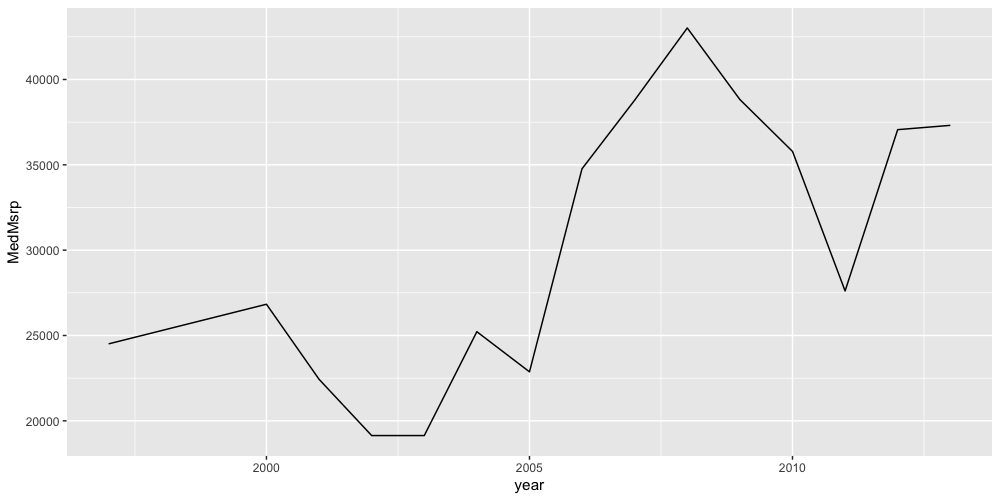

In [51]:
g <- ggplot(data=dat, aes(x=year, y=MedMsrp)) 
g + geom_line()

- `g <- ggplot(data=hybrid, aes(x=year, y=msrp, group=class, color=class))` initializes a ggplot object g using the hybrid data frame.

- `aes(x = year, y = msrp)` maps year to the $x-$axis and msrp (manufacturer’s suggested retail price) to the $y-$axis.

- `group = class` tells `ggplot2` to group the data by `class` for plotting, so each vehicle class will be plotted as a separate line.

- `color = class` assigns a unique color to each vehicle class.

- `stat_summary(fun = median, geom = "line")`

  - `stat_summary()` summarizes data for each group (in this case, each combination of year and class) and displays the result.

  - `fun = median` specifies that `stat_summary()` should use the median of msrp for each year within each class group.
  
  - `geom = "line"` specifies that the summary statistic (median MSRP) should be displayed as a line for each class across years.

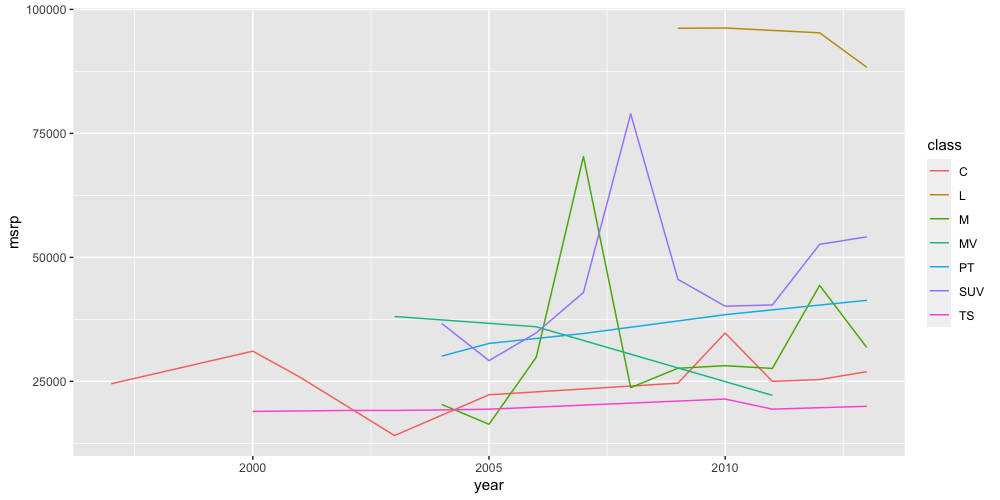

In [54]:
g <- ggplot(data=hybrid, aes(x=year, y=msrp, group=class, color=class)) 
g + stat_summary(fun = median, geom = "line")

There are no errors in our code, and it runs successfully. However, we should evaluate if the visualization effectively conveys the intended information. Are the data patterns clear, and does the chart highlight the key trends we want to show? If not, we may need to adjust our approach to make the visualization more informative and engaging. are no errors in our code. But does this informative.

In [55]:
## Define a vector 'VehicleClass' containing selected vehicle classes of interest
VehicleClass <- c("M", "SUV", "L")

## Filter the 'hybrid' dataset to keep rows where the 'class' is in 'VehicleClass' 
## and 'year' is 2005 or later. 
## Store the result in 'dat'.
dat <- hybrid %>%
         filter(class %in% VehicleClass & year >= 2005)

## Display the dimensions of the filtered data frame 'dat' 
## (number of rows and columns) to verify the size of the filtered dataset
dat %>% dim()

[1] 101   9

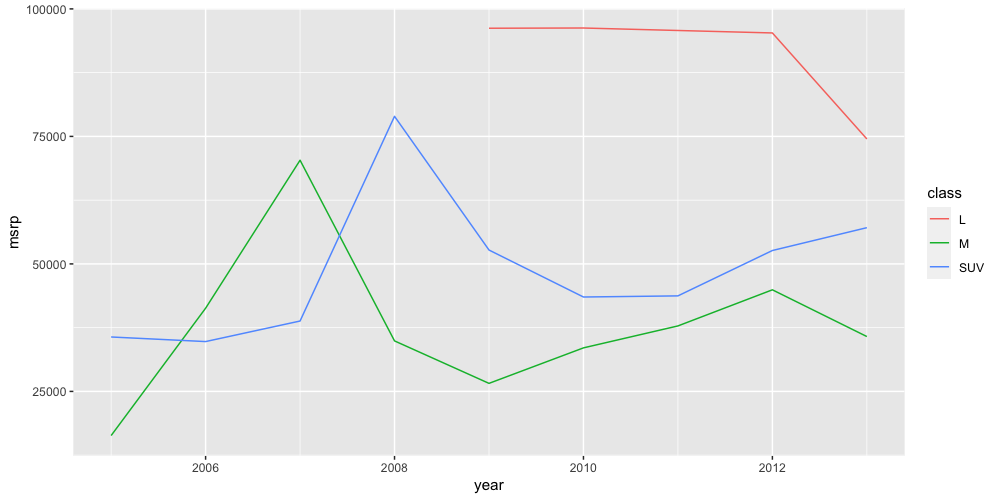

In [56]:
g <- ggplot(data=dat, aes(x=year, y=msrp, group=class, color=class)) 
g + stat_summary(fun = mean, geom = "line")